<a href="https://colab.research.google.com/github/JesseKiguta/water-quality-model-assignment/blob/Jesse/Jesse_Kiguta__Water_Potability_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This dataset (https://www.kaggle.com/datasets/uom190346a/water-quality-and-potability?select=water_potability.csv) contains water quality measurements and assessments related to potability, which is the suitability of water for human consumption. The dataset's primary objective is to provide insights into water quality parameters and assist in determining whether the water is potable or not. Each row in the dataset represents a water sample with specific attributes, and the "Potability" column indicates whether the water is suitable for consumption.

The dataset will be used to create a simple model with Keras and Tensorflow to predict water potability.

Step 1: Import necessary modules

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout, BatchNormalization, Activation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
from tensorflow.keras.regularizers import l2

Step 2: Load the data

In [3]:
path = '/content/water_potability.csv'
df = pd.read_csv(path)
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


Step 3: Preprocess the data

In [ ]:
# Checking for missing columns
print(df.isnull().sum())

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


In [4]:
# Filling in missing columns and reloading data
missing_columns = ['ph', 'Sulfate', 'Trihalomethanes']
for column in missing_columns:
  df[column] = df[column].fillna(df[column].median())
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.036752,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [5]:
# Splitting the data into features and target labels
x = df.drop('Potability', axis=1)
y = df['Potability']

# Min-max scaling and reloading scaled data
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
x_df = pd.DataFrame(x_scaled, columns=x.columns)
x_df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,0.502625,0.571139,0.336096,0.543891,0.680385,0.669439,0.313402,0.699753,0.286091
1,0.265434,0.297400,0.300611,0.491839,0.579704,0.719411,0.497319,0.450999,0.576793
2,0.578509,0.641311,0.321619,0.698543,0.579704,0.414652,0.562017,0.532866,0.303637
3,0.594055,0.605536,0.356244,0.603314,0.647347,0.317880,0.622089,0.808065,0.601015
4,0.649445,0.484851,0.289922,0.484900,0.514545,0.379337,0.358555,0.253606,0.496327


Potability
0    1998
1    1278
Name: count, dtype: int64


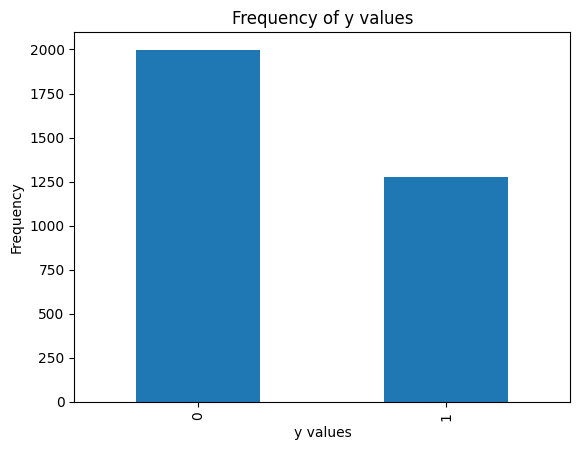

In [6]:
# Check and visualize if y values are balanced
print(y.value_counts())

y.value_counts().plot(kind='bar')
plt.title('Frequency of y values')
plt.xlabel('y values')
plt.ylabel('Frequency')
plt.show()

In [7]:
# Balancing and confirming values
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x_df, y)
print(y_resampled.value_counts())

Potability
0    1998
1    1998
Name: count, dtype: int64


Step 4: Split the data for training (70-15-15 ratio of training, validation and testing).

In [8]:
X_train, X_temp, y_train, y_temp = train_test_split(x_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

Step 5: Building and compiling the model.

In [76]:
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))

model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(1, activation='sigmoid'))

optimizer = tf.keras.optimizers.Nadam(learning_rate=0.0004)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

Step 6: Training the model.

In [77]:
EarlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
ReduceLR = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=7, min_lr=1e-6)
history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_data=(X_val, y_val), callbacks=[EarlyStopping, ReduceLR])

Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.5203 - loss: 0.8123 - val_accuracy: 0.4975 - val_loss: 0.6932 - learning_rate: 4.0000e-04
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5419 - loss: 0.7323 - val_accuracy: 0.5042 - val_loss: 0.6928 - learning_rate: 4.0000e-04
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5681 - loss: 0.7104 - val_accuracy: 0.5025 - val_loss: 0.6923 - learning_rate: 4.0000e-04
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5728 - loss: 0.7093 - val_accuracy: 0.4992 - val_loss: 0.6918 - learning_rate: 4.0000e-04
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5809 - loss: 0.7000 - val_accuracy: 0.5025 - val_loss: 0.6910 - learning_rate: 4.0000e-04
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6022 - loss: 0.6673 - val_accuracy: 0.5025 - val_loss: 0.6906 - learning_rate: 4.0000e-04
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 

Train: 0.753, Test: 0.659


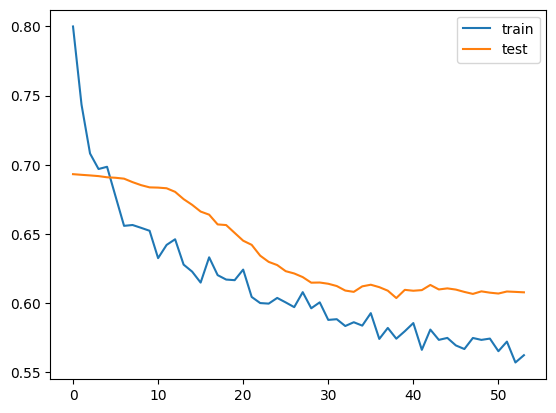

In [78]:
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, val_acc = model.evaluate(X_val, y_val, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, val_acc))

# Plotting the training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')

plt.legend()
plt.show()

Step 7: Checking the confusion matrix, F1 score, recall and precision of the model.

In [79]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)
recall = cm[0][0] / (cm[0][0] + cm[1][0])
precision = cm[0][0] / (cm[0][0] + cm[0][1])
f1_score = 2 * (precision * recall) / (precision + recall)
print(f'Confusion Matrix: {cm}')
print(f'F1 score: {f1_score}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Confusion Matrix: [[174 126]
 [ 90 210]]
F1 score: 0.6170212765957446
Recall: 0.6590909090909091
Precision: 0.58
